## Setup

In [1]:
#pip install --upgrade git+https://github.com/keras-team/keras-cv -q

In [2]:
from tqdm.auto import tqdm
import tensorflow as tf
import keras

import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

2024-02-12 23:42:33.263077: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 23:42:33.420083: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 23:42:33.420130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 23:42:33.480098: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 23:42:33.537049: I tensorflow/core/platform/cpu_feature_guar

Using TensorFlow backend


In [3]:
tf.__version__

'2.15.0'

In [4]:
class_ids = [
    #"TV", "bed", "chair", "clock", "console", "consoleeeeee", "door", "fan", "light", "sofa", "switchboard", "table"
    "emptychair", "fullchair"
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [5]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xs_backbone_coco",  # We will use yolov8 small backbone with coco weights
    #trainable = False
)

2024-02-12 23:42:39.942605: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:42:40.050983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:42:40.051043: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:42:40.055136: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:42:40.055233: I external/local_xla/xla/stream_executor

In [6]:
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1
)

In [7]:
yolo.load_weights("model-xs.h5")
#yolo = keras_cv.models.load("model.h5")

(1, 640, 640, 3)


2024-02-12 23:42:50.140678: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-12 23:42:51.982008: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-12 23:42:52.575863: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 12s 12s/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}


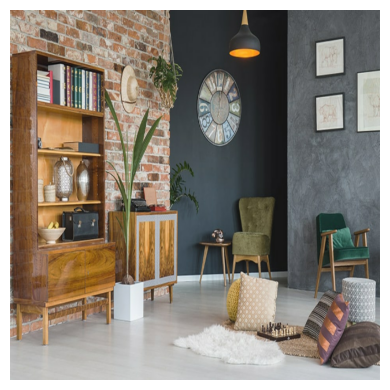

(1, 640, 640, 3)
1/1 [==============================] - 0s 254ms/step
{'boxes': <tf.RaggedTensor [[[0.75476074, 0.2597351, 638.3587, 638.7091]]]>, 'confidence': <tf.RaggedTensor [[0.6049975]]>, 'classes': <tf.RaggedTensor [[0.0]]>, 'num_detections': array([1], dtype=int32)}


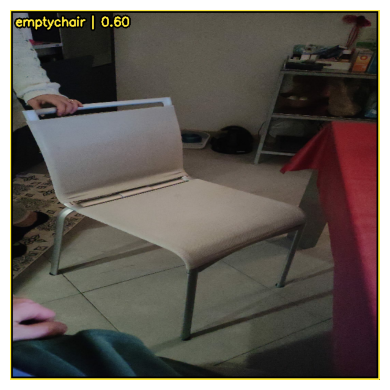

(1, 640, 640, 3)
1/1 [==============================] - 0s 244ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}


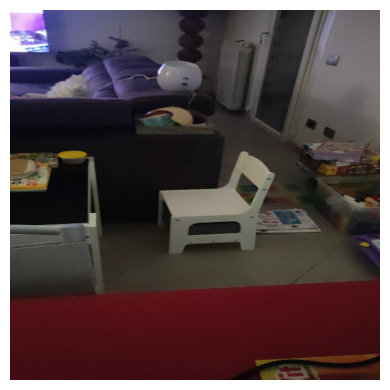

(1, 640, 640, 3)
1/1 [==============================] - 0s 247ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}


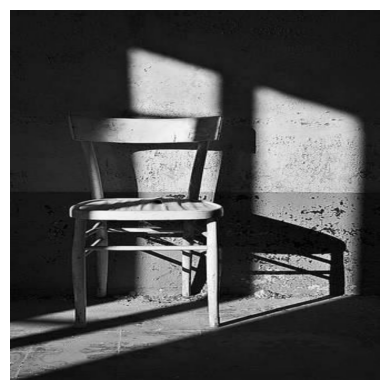

(1, 640, 640, 3)
1/1 [==============================] - 0s 247ms/step
{'boxes': <tf.RaggedTensor [[[32.459564, 4.729492, 554.9154, 609.1647]]]>, 'confidence': <tf.RaggedTensor [[0.784321]]>, 'classes': <tf.RaggedTensor [[1.0]]>, 'num_detections': array([1], dtype=int32)}


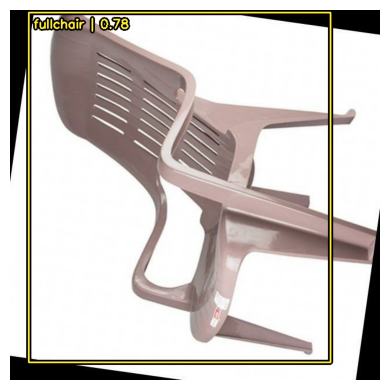

In [8]:
def visualize_generic(model, image_name, bounding_box_format):
    #images = load_image(os.path.join(path_images, image_name))
    image = tf.io.read_file(image_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [640,640])
    images = tf.cast(image, tf.float32)
    images = tf.expand_dims(images, axis=0)
    print(images.shape)

    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    print(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        #y_true={},
        y_pred=y_pred,
        scale=4,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )


visualize_generic(yolo, image_name="../test_images/testimage_1.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_2.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_3.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_4.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_5.jpg", bounding_box_format="xyxy")
#img_0120_jpg.rf.36da0f1b2f59ec13cb70e1b82defd9a0.jpg